In [25]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choosing the dataset to investigate in the subsequent steps of the 
# notebook and reading its data into a pandas dataframe.
DATASET = 'train.csv'

df = pd.read_csv(DATASET)

df.set_index('PassengerId', inplace = True)

# Inspecting the data set.
print(df.describe())
print(df.head())
df.info()

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name    

Feature Engineering

In [26]:
# Encoding Male & Female Individuals in binary form.
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})


# Extracting only the first letter of the cabin in which the passengers 
# are situated and replacing the NaN values with 'Z' for readibility.
df['cabins_stripped'] = df['Cabin'].apply(lambda x: x.split(' ')[0][0] if pd.notna(x) else 'Z')
print(df["cabins_stripped"].unique())

# One of the passengers is in cabin 'T' which appears to has no apparent
# meaning here, thus we consider its cabin as 'Z'.

df['cabins_stripped'] = df['cabins_stripped'].replace('T','Z')
print(df["cabins_stripped"].head(15))


df['family_name'] = df['Name'].apply(lambda x: x.split(',')[0].strip())
fam_counts = df.groupby('family_name').size()


df['cabins_stripped'] = df['Cabin'].apply(lambda x: x.split(' ')[0][0] if pd.notna(x) else 'Z')
print(df["cabins_stripped"].unique())
print(df["cabins_stripped"].head(15))


# Grouping all passengers by their family name only
grouped_fam_cabin = df.groupby('family_name')[['family_name','cabins_stripped','Fare','Pclass']]
#print(grouped_fam_cabin)

for family, group in grouped_fam_cabin:

    #id_count_per_group = grouped_fam_cabin.get_group(family).unique()
    id_count_per_group = len(group['family_name'])
    if id_count_per_group > 1:
        print(grouped_fam_cabin.get_group(family))





['Z' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
PassengerId
1     Z
2     C
3     Z
4     C
5     Z
6     Z
7     E
8     Z
9     Z
10    Z
11    G
12    C
13    Z
14    Z
15    Z
Name: cabins_stripped, dtype: object
['Z' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
PassengerId
1     Z
2     C
3     Z
4     C
5     Z
6     Z
7     E
8     Z
9     Z
10    Z
11    G
12    C
13    Z
14    Z
15    Z
Name: cabins_stripped, dtype: object
            family_name cabins_stripped   Fare  Pclass
PassengerId                                           
280              Abbott               Z  20.25       3
747              Abbott               Z  20.25       3
            family_name cabins_stripped  Fare  Pclass
PassengerId                                          
309             Abelson               Z  24.0       2
875             Abelson               Z  24.0       2
            family_name cabins_stripped  Fare  Pclass
PassengerId                                          
211                 Ali               Z  7

Survived  Age   Embarked
0         1.0   S           1.000000
          2.0   S           0.857143
                Q           0.142857
          3.0   S           1.000000
          4.0   S           0.666667
                              ...   
1         58.0  C           0.333333
          60.0  C           1.000000
          62.0  S           1.000000
          63.0  S           1.000000
          80.0  S           1.000000
Length: 233, dtype: float64


<AxesSubplot:xlabel='cabins_stripped', ylabel='Fare'>

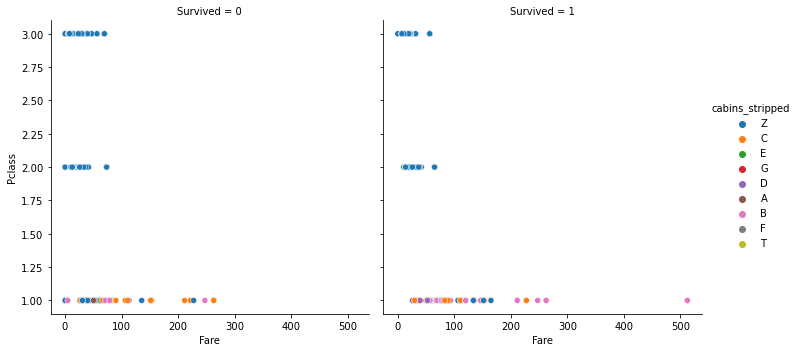

<Figure size 432x288 with 0 Axes>

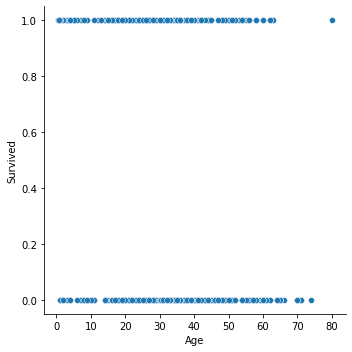

<Figure size 432x288 with 0 Axes>

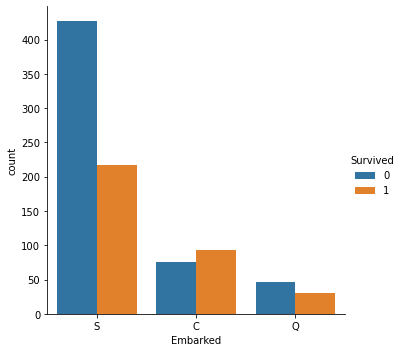

<Figure size 432x288 with 0 Axes>

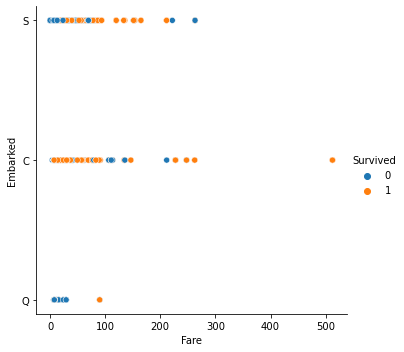

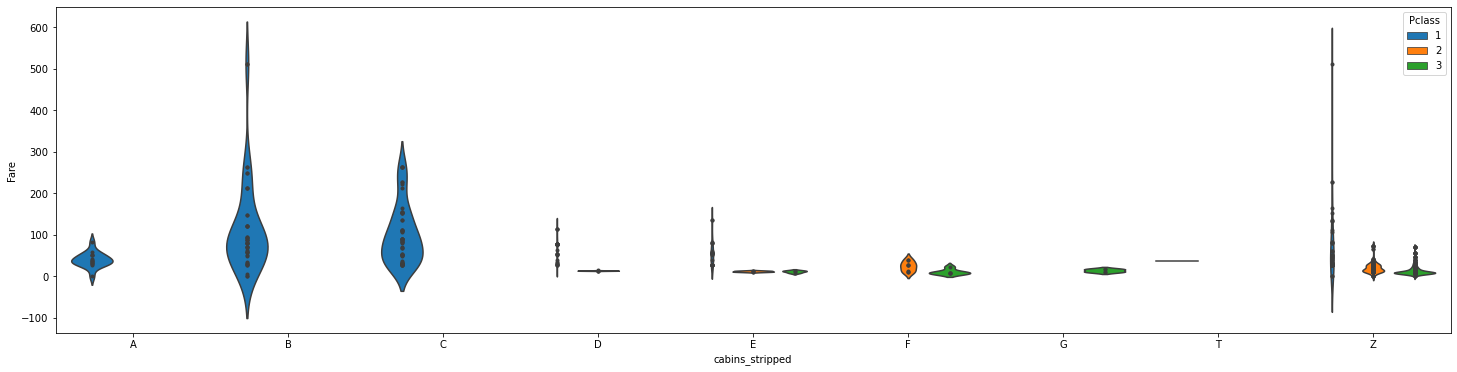

In [27]:
## Extracting statistics insight from the dataset.

if DATASET == 'train.csv':  
    sns.relplot(x = 'Fare', y = 'Pclass', hue = 'cabins_stripped', col = "Survived",  kind = 'scatter', data = df)

    plt.figure()
    sns.relplot(x = 'Age', y = 'Survived', kind = 'scatter', data = df)

    plt.figure()
    sns.catplot(x = 'Embarked', hue = 'Survived', kind = 'count', data = df)

    plt.figure()
    sns.relplot(x = 'Fare', y = 'Embarked', hue = 'Survived', kind = 'scatter', data = df)

    surv_age = df.groupby(['Survived','Age'])[['Survived', 'Embarked']].value_counts(normalize = True)
    print(surv_age)

ordered_cabins = sorted(df['cabins_stripped'].unique())
plt.figure(figsize=(25, 6))

sns.violinplot(x='cabins_stripped', y = 'Fare', hue = 'Pclass', inner = 'point', order=ordered_cabins, saturation= 1, fill = False, width = 0.8, data=df)

#plt.figure()
#sns.catplot(x='Fare', y = 'cabins_stripped', hue='Survived', order = ordered_cabins, kind = 'count', data=df)

    






In [28]:
if DATASET == 'train.csv':

    print('The proportion of people who have survived depending on where they embarked is:')
    survivors_embarked = df.groupby(['Survived', 'Embarked'])[['Survived', 'Embarked']].value_counts()
    print(survivors_embarked)


    total_embarked = df.groupby('Embarked').size()
    props_embarked_survived = survivors_embarked.div(total_embarked, level='Embarked')
    print('Proportion of passengers who survived/died as a function of their embarkment port \n', props_embarked_survived)

    survivors_embarked2 = df.groupby(['Survived', 'Embarked'])['Fare'].mean()
    print(survivors_embarked2)

    #survivors_embarked3 = df.groupby(['Survived', 'Embarked', 'Pclass'])[['Survived', 'Embarked', 'Pclass']].value_counts()
    survivors_embarked3 = df.groupby(['Survived', 'Embarked', 'Pclass']).size()
    print('Surv 3', survivors_embarked3)


The proportion of people who have survived depending on where they embarked is:
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64
Proportion of passengers who survived/died as a function of their embarkment port 
 Survived  Embarked
0         C           0.446429
          Q           0.610390
          S           0.663043
1         C           0.553571
          Q           0.389610
          S           0.336957
dtype: float64
Survived  Embarked
0         C           35.443335
          Q           13.335904
          S           20.743987
1         C           79.720926
          Q           13.182227
          S           39.547081
Name: Fare, dtype: float64
Surv 3 Survived  Embarked  Pclass
0         C         1          26
                    2           8
                    3          41
          Q         1           1
                    

More feature engineering

In [29]:


cabin_avg_fare = df.loc[df['cabins_stripped'] != 'Z'].groupby('cabins_stripped')['Fare'].mean()
unique_cabins = sorted(df['cabins_stripped'].unique())
print('Average prices for cabins depending on the cabin floor are the following: \n',cabin_avg_fare)

cabin_na = df.loc[df['cabins_stripped'] == 'Z', 'Fare']


def impute_cabins(row):
    distance = {}
    for cabin, fare in cabin_avg_fare.items():
        distance[cabin] = np.abs(fare - row['Fare'])/fare

    return min(distance, key = distance.get)


imputed_cabins = df.loc[df['cabins_stripped'] == 'Z'].apply(impute_cabins, axis = 1)
df.loc[df['cabins_stripped'] == 'Z', 'cabins_stripped'] = imputed_cabins
print(df[['Fare', 'cabins_stripped']].head(10))

# Dropping the cabins column
df.drop('Cabin', axis=1, inplace=True)
df.rename(columns={'cabins_stripped': 'Cabin'}, inplace=True)

cabin_encoding_map = dict(zip(unique_cabins,list(range(1,len(unique_cabins)+1))))
print(cabin_encoding_map)
df['Cabin'] = df['Cabin'].map(cabin_encoding_map)
print(df.head())

# Replacing the missing values in the 'Age' column by the mean passenger age.
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Replacing the missing values in the 'Embarked' column by the mode of the column.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(['Name', 'family_name', 'Embarked', 'Ticket'], axis = 1, inplace = True)

print(df.info())




Average prices for cabins depending on the cabin floor are the following: 
 cabins_stripped
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
T     35.500000
Name: Fare, dtype: float64
                Fare cabins_stripped
PassengerId                         
1             7.2500               G
2            71.2833               C
3             7.9250               G
4            53.1000               C
5             8.0500               G
6             8.4583               G
7            51.8625               E
8            21.0750               F
9            11.1333               G
10           30.0708               T
{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'Z': 9}
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

    

In [30]:
# LETS BUILD A MODEL
import sklearn
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Before building the model we need to standardise the 'Age' and 'Fare'
# columns.

scaler = StandardScaler()

standardized_columns = ['Age', 'Fare']

df[standardized_columns] = scaler.fit_transform(df[standardized_columns])


if DATASET == 'test.csv':
    X = df.drop(columns=['Fare'])

if DATASET == 'train.csv':

    X = df.drop(columns=['Survived','Fare'])
    y = df['Survived']

    # Segmentation of the sets "X" et "y" into test (20%) and training sets (80%). 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    # Création et entraînement du modèle de régression.
    model = LogisticRegression(solver='liblinear', max_iter=100000, class_weight = 'balanced')
    model.fit(X_train, y_train)


    # Prédictions des Metier sur le set de test.
    y_test_pred = model.predict(X_test)
    # Calcul et impression des métriques à utiliser pour évaluer l'efficacité du modèle.
    print('Résultats du test du modèle:')
    target_names = ['Not Survived', 'Survived']
    print(classification_report(y_test, y_test_pred, target_names=target_names))

    # Analysing the coeffs

    coefficients = model.coef_[0]
    features = df.drop(columns=['Survived','Fare'])
    features = features.columns
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print("Les coefficients/poids du modèle sont les suivants:")
        print(coef_df)



Résultats du test du modèle:
              precision    recall  f1-score   support

Not Survived       0.87      0.87      0.87       119
    Survived       0.75      0.73      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179

Les coefficients/poids du modèle sont les suivants:
  Feature  Coefficient
1     Sex     2.546641
4   Parch    -0.047118
5   Cabin    -0.059161
3   SibSp    -0.292359
2     Age    -0.474307
0  Pclass    -0.921423


Looking at the statistics above it can first be seen that the location where passengers embarked can play a role on their chance of survival, more so if they embarked in Queenstown "Q" or Southamption "S" since only ~39% and ~34% of these passengers survived respectively compared to 55% for the passengers who embarked in Cherbourg. This may be linked to the average price of the fare they paid i.e. the proportion of the demographics who embarked in each port. 
Effectively, looking at the average fare price paid by the passengers who survived and embarked in Cherbourg it is twice that of the fare of the passengers who died. On the other hand, this does not necessarily have an effect on the fare price for the two other ports. Looking further, it becomes evident that more wealthy clients embarked in Cherbourg. When passengers embarked in Cherbourg in 1st class they had an approximately 70% chance of survival whereas they only had a 38% chance of surviving when embarking in 3rd class, and ~50% of survival chance when embarking in 2nd class. 

On the other hand, it does not appear to play a big role for the passengers who embarked in Queenstown since most of them embarked in 3rd class. For Southampton it can be seen again that emabrking in 1st class is advantageous for survival, whilst it become less than 50% for 2nd and 3rd classm with the third class survival rate dropping to 19%.

In conclusion, the travel class and the location where people embarked onto the Titanic are thought to have an impact on the survival rate of passengers. Importantly the 'Pclass' parameter appears to be an ordinal variable with an inverse realtionship to survival rate, thus it was decided not to encode it.

In [31]:
 # Oversampling the minority (survivor) class

from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled dataset
model = LogisticRegression(solver='liblinear', max_iter=10000, class_weight = 'balanced')
model.fit(X_train_resampled, y_train_resampled)


# Prédictions des Metier sur le set de test.
y_test_pred = model.predict(X_test)
# Calcul et impression des métriques à utiliser pour évaluer l'efficacité du modèle.
print('Résultats du test du modèle:')
target_names = ['Not Survived', 'Survived']
print(classification_report(y_test, y_test_pred, target_names=target_names))

Résultats du test du modèle:
              precision    recall  f1-score   support

Not Survived       0.86      0.88      0.87       119
    Survived       0.75      0.72      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



In [32]:
 # Oversampling the minority (survivor) class

from imblearn.under_sampling import RandomUnderSampler
# Initialize SMOTE
undersampler = RandomUnderSampler(random_state = 42)

# Resample X_train and y_train
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Train the model on the resampled dataset
model = LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced')
model.fit(X_train_undersampled, y_train_undersampled)


# Prédictions des Metier sur le set de test.
y_test_pred = model.predict(X_test)
# Calcul et impression des métriques à utiliser pour évaluer l'efficacité du modèle.
print('Résultats du test du modèle:')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Résultats du test du modèle:
              precision    recall  f1-score   support

Not Survived       0.87      0.87      0.87       119
    Survived       0.75      0.73      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



Looking at the results above, it can be seen that oversampling the minority class does not help to improve the predictions of the model, whilst they are similar in the case where the majority class is undersampled.
Let's see if changing the decision threshhold helps in reducing the amount of false positives obtained for the survived class, meaning to reduce the amount of people which are wrongfully predicted to survive. 

The target threshold is 0.4747 and the F1 score is : 0.77
The target threshold is 0.4747 and the accuracy is : 0.84
The classification report with the target threshold is:
               precision    recall  f1-score   support

Not Survived       0.89      0.87      0.88       119
    Survived       0.76      0.78      0.77        60

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179
 


<Figure size 432x288 with 0 Axes>

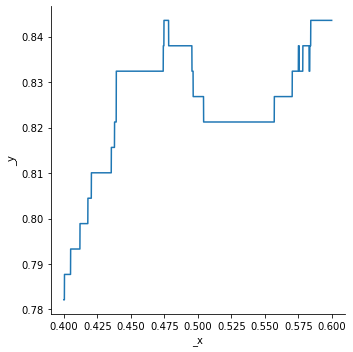

<Figure size 432x288 with 0 Axes>

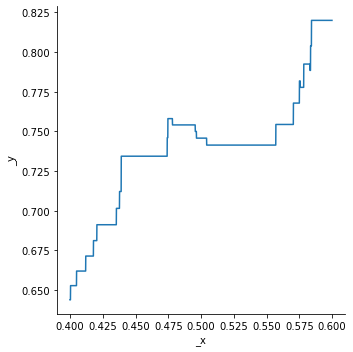

<Figure size 432x288 with 0 Axes>

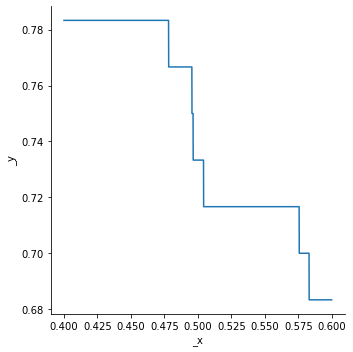

<Figure size 432x288 with 0 Axes>

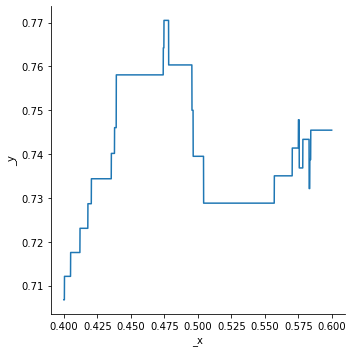

In [33]:
y_prob = model.predict_proba(X_test)[:,1] # Probability of class 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = {}
precision = {}
recall = {}
F1score = {}

threshold = np.array(np.arange(0.4,0.6,0.0001))

for th in threshold:
    y_pred = (y_prob >= th).astype(int)

    accuracy[th] = accuracy_score(y_test, y_pred)
    precision[th] = precision_score(y_test, y_pred, zero_division=0)
    recall[th] = recall_score(y_test, y_pred, zero_division=0)
    F1score[th] = f1_score(y_test, y_pred, zero_division=0)

plt.figure()
sns.relplot(x = threshold, y = accuracy.values(), kind = 'line')
plt.figure()
sns.relplot(x = threshold, y = precision.values(), kind = 'line')
plt.figure()
sns.relplot(x = threshold, y = recall.values(), kind = 'line')
plt.figure()
sns.relplot(x = threshold, y = F1score.values(), kind = 'line')


# Extracting the threshold at which the F1 score is the best
maxF1 = max(F1score, key = F1score.get)
maxAcc = max(accuracy, key = accuracy.get)
print(f'The target threshold is {round(maxF1,5)} and the F1 score is : {round(F1score[maxF1],2)}')
print(f'The target threshold is {round(maxAcc,5)} and the accuracy is : {round(accuracy[maxAcc],2)}')

print(f'The classification report with the target threshold is:\n {classification_report(y_test, (y_prob >= maxF1).astype(int), target_names = target_names)} ')


Some Ideas to improve the predictions:

- test another model
- test aggregation of models
- test the possible importance of encoding the cabins by separating the letter and the number of the cabin, maybe only on the values which are known at first.
- look into the inability of the model to accurately predict the minority class --> visualize the sigmoid and find ways to mitigate this problem other than augmenting the data, balancing the classes and changing the classification threshold. 

Now, the performance of different binary classification models is to be investigated.

1. The list of models to be studied is defined.
2. The grid of hyperparameters to explore is defined.
3. A gridsearch is applied to each model in an iterative manner.
4. The best instance of each classification model is extracted and saved, along with all the grid search results which are analysed to refine the gridsearch space empirically.
5. The best models are fitted to the testing set without cross-validation contrary to what is done within the gridsearch, and their performance is compared.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import pickle

# Defining the list of models to be tested on the trainig dataset.

models_dict = {1: 'Logistic Regression', 2: 'Random Forest', 3: 'Support Vector Machine', 4: 'Support Vector Machine 2', 5: 'XGBoost'}

# Choosing which model to use, 1-5 if all models are to be gridsearched
model_numbers = [1,2,3,4,5]

# Initialising an array containing the names of the model to be used 
# during the gridsearch.
enable_grid_search = []

for element in model_numbers:
    enable_grid_search.append(models_dict[element])


# Initialising models and their respective hyperparameters to be kept
# fixed throughout the grid search.
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(n_estimators = 100, class_weight='balanced', criterion='entropy', max_depth=5, random_state = 30)),
    ('Support Vector Machine', SVC(probability=True, class_weight='balanced')),
    ('Support Vector Machine 2', SVC(probability=True, class_weight='balanced')),
    ('XGBoost', XGBClassifier(objective = 'binary:logistic', eta = 0.4, max_depth = 1))
]



# Defining the hyperparameters to test out for each model for the gridsearch

# Define parameter grids for each model
parameter_grid_full = {
    'Logistic Regression': {
        'classifier__C': np.linspace(0.1,10,10),
        'classifier__penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'classifier__n_estimators': np.linspace(110,140,31).astype(int),
        #'classifier__max_depth': list(range(5))
    },
    'Support Vector Machine': {
        'classifier__C': np.linspace(0.1, 1, 10),
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
    },
    'Support Vector Machine 2': {
        'classifier__C': np.linspace(0.1, 1, 10),
        'classifier__kernel': ['poly'],
        'classifier__degree': [1, 2, 3]
    },
    'XGBoost': {
        #'classifier__eta': np.linspace(0.3, 0.6, 5),
        #'classifier__max_depth': np.linspace(1, 11, 6).astype(int),
        'classifier__n_estimators': np.linspace(190,210,21).astype(int),
        'classifier__gamma': np.linspace(0.01, 0.5, 20)
    }
}

# Initialising empty lists to store the results of the best models

gs_results = [] # To store the results of the gridsearch
perf_reports = [] # To store the performance reports of each model and print them afterwards.
updated_models = {} # To store the best versions of each model with their updated hyperparameters.


if DATASET == 'train.csv':
    # Individually fitting the different models to the training set in an iterative manner,
    # before predicting on the test set and outputting the classification report for each model.

    for n, m in models:

        # Filtering which model to perform the grid search on
        if n not in enable_grid_search:
            continue
        print(f"{n} \n")

        pipeline = Pipeline([
            ('classifier', m)
        ])

        parameter_grid = parameter_grid_full[n] 
        grid_search = GridSearchCV(pipeline, 
                                parameter_grid, 
                                cv = 2, 
                                scoring='accuracy', 
                                refit = 'accuracy',
                                verbose = True)
        
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        predictions = best_model.predict(X_test)

        updated_models[n] = best_model.named_steps['classifier']
        print(n, best_model.named_steps['classifier'])
        print(updated_models[n])

        with open('updated_models', 'wb') as f:
            pickle.dump(updated_models, f)

        ## Storing the parameters and the score of the best instance of each of the models tested.
        gs_results.append({
            'model': n,
            'best_parameters': grid_search.best_params_,
            'best_score': grid_search.best_score_,
        })

        perf_reports.append({
            'n': ('classification_report', classification_report(y_test, predictions, target_names=target_names))
        })

        results = pd.DataFrame(grid_search.cv_results_)
        results = results.sort_values(by = 'mean_test_score', ascending=False)


        ## Defining the name of the file in which the results of the grid search will be output.

        n_clean = n.replace(' ', '_')
        file_name = f'{n_clean}_GS_results.csv'

        results.to_csv(file_name, index = False)



    #pipeline.fit(X_train, y_train)
    #predictions = pipeline.predict(X_test)
    #report = classification_report(y_test, predictions, target_names=target_names)

    #print(f'The classification report for the {n} model is:\n {perf_reports} ')
    



Logistic Regression 

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Logistic Regression LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
Random Forest 

Fitting 2 folds for each of 31 candidates, totalling 62 fits
Random Forest RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=130, random_state=30)
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=130, random_state=30)
Support Vector Machine 

Fitting 2 folds for each of 40 candidates, totalling 80 fits
Support Vector Machine SVC(C=0.9, class_weight='balanced', probability=True)
SVC(C=0.9, class_weight='balanced', probability=True)
Support Vector Machine 2 

Fitting 2 folds for each of 30 candidates,

In [ ]:
#print(updated_models['Logistic Regression'])
from pprint import pprint
opti_perf_reports = {}

if DATASET == 'train.csv':
    for model_name in enable_grid_search:
        opti_predictions = updated_models[model_name].predict(X_test)
        print(len(opti_predictions))
        opti_perf_reports[model_name] = ('classification_report', classification_report(y_test, opti_predictions, target_names=target_names))

        print(f'The performance of the {model_name} model is shown below:\n')
        pprint(opti_perf_reports[model_name])

        #prediction_filename = f'{model_name}_predictions'

        #prediction_dataframe = pd.DataFrame({'PassengerID': X_test.index, 'Predictions': opti_predictions})
        #prediction_dataframe.to_csv(prediction_filename, header = False, index = False) """
    
    


if DATASET == 'test.csv':
    
    with open('updated_models', 'rb') as f:
        updated_models = pickle.load(f)
    print(updated_models)
    for model_name in enable_grid_search:
        opti_predictions = updated_models[model_name].predict(X)
        print(len(opti_predictions))

        prediction_filename = f'submission_{model_name}_predictions'

        prediction_dataframe = pd.DataFrame({'PassengerId': X.index, 'Survived': opti_predictions})
        prediction_dataframe.to_csv(f'{prediction_filename}.csv', index = False, header = True)
    


    


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)